<a href="https://colab.research.google.com/github/drwbkr1/Grad504-K-Nearest-Neighbor-Classifier/blob/main/KNN_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load dataset
import pandas as pd
import numpy as np

In [18]:
#Any dataset is verified for basic parameters before preprocessing.
def load_csv(file):
  df= pd.read_csv(file)

  #Check for data in dataset, numerical features for supporting floating-point inputs
  if df.shape[1] < 2:
    raise ValueError("File must have at least one feature and a target")
  try:
    X_df= df.iloc[:, :-1].astype(float)
  except ValueError:
    raise ValueError("Error: Features must be numerical")

  #Split dataset into features and target, features to floating point.
  X= df.iloc[:, :-1].to_numpy(dtype=float)
  y= df.iloc[:, -1].to_numpy()

  #Check for feature-target congruency, feature congruency
  if not X.shape[0]==y.shape[0]:
    raise ValueError("Error: Features and target must have the same length")
  if not all(len(features)==len(X[0]) for features in X):
    raise ValueError("Error: All features must have the same length")

  return X, y

In [13]:
#Establish the model class to create new instance for any dataset. Includes classifier mechanics and fit/predict methods.
class KNNClassifier:
  def __init__(self, n_neighbors):
    self.k= n_neighbors
    self.X_train= []
    self.y_train= []

  def fit(self, X_train, y_train): #Receives training split, fit it to KNN instance.
    self.X_train= X_train
    self.y_train= y_train

  def euclidean_distance(self, X_test, X_train):
    distance= np.sqrt(sum((X_testi - X_traini)**2 for X_testi, X_traini in zip(X_test, X_train)))
    return distance

  def KNN_classifier(self, X_test):
    distances= [(self.euclidean_distance(X_test, X_train), label) for X_train, label in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[0])
    k_neighbors= [label for _, label in distances[:self.k]]
    from collections import Counter
    return Counter(k_neighbors).most_common(1)[0][0]

  def predict(self, X_test): #Utilizes KNN_classifier method to create a list of predicted classifiers.
    return [self.KNN_classifier(x) for x in X_test]

In [16]:
course= ("/content/drive/MyDrive/Colab Notebooks/datasets/Prog1data.csv")
iris= ("/content/drive/MyDrive/Colab Notebooks/datasets/Iris.csv")

#Load data into core variables
X, y, df= load_csv(iris)
for i in range(3):
  print(X[i], y[i])
print(X.dtype, y.dtype)

[1.  5.1 3.5 1.4 0.2] Iris-setosa
[2.  4.9 3.  1.4 0.2] Iris-setosa
[3.  4.7 3.2 1.3 0.2] Iris-setosa
float64 object


In [ ]:
# @title
from sklearn.manifold import TSNE
import seaborn as sns

tsne= TSNE(n_components= 2, random_state= 0)
X_tsne= tsne.fit_transform(X)
tsne_df= pd.DataFrame(X_tsne, columns= ['TSNE_dim1', 'TSNE_dim2'])

sns.scatterplot(x= 'TSNE_dim1',
                y= 'TSNE_dim2',
                data= tsne_df,
                hue = y)


In [28]:
train_frac= .6

rng= np.random.default_rng(seed= 0)
shuffled_idx= rng.permutation(len(X))
n_train= int(len(X) * train_frac)

train_idx= shuffled_idx[:n_train]
test_idx= shuffled_idx[n_train:]

X_train= X[train_idx]
y_train= y[train_idx]
X_test=X[test_idx]
y_test= y[test_idx]

In [29]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   train_size= .2, test_size= .8,
                                                   random_state= 0)'''

model= KNNClassifier(n_neighbors= 20)
model.fit(X_train, y_train)
predictions= model.predict(X_test)
print(predictions[:10])

correct= sum(p==a for p, a in zip(predictions, y_test))
total= len(y_test)
accuracy= correct/total
print(f"Accuracy: {accuracy}")

['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica']
Accuracy: 1.0


<Axes: xlabel='Predicted', ylabel='Actual'>

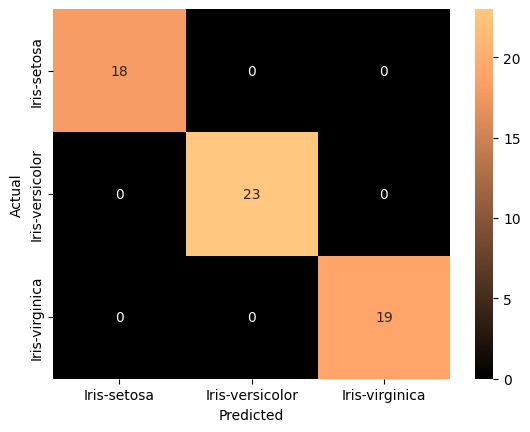

In [30]:
import seaborn as sns
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(cm, annot=True, fmt="d", cmap="copper")